In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import print_function

#%matplotlib inline

import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

%matplotlib inline

# Set random seed for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  999


In [3]:
import sys
from utils.commandline import load_config
from importlib.machinery import SourceFileLoader
from datasets.web_caricature import WebCaricatureDataset

In [4]:
# load configuration file from specified configuration file path
config = SourceFileLoader('config', './config/config_train.py').load_module()

6128 images of 126 classes loaded.
Classes 126: 3016 photos, 3112 caricatures

device: cpu



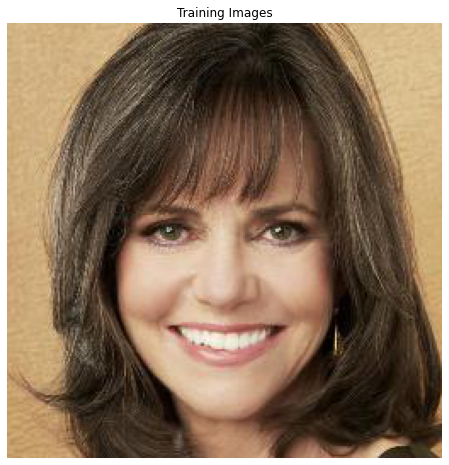

In [5]:
# We can use an image folder dataset the way we have it setup.
# Create the dataset
dataset = WebCaricatureDataset(config)

# Create the dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=config.in_batch, shuffle=True)

# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")
print(f"\ndevice: {device}\n")

# Plot some training images
batch = next(iter(dataloader))

real_batch = batch["photo"]

plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(), (1 ,2, 0)))

In [6]:
from models.model_warpgan import WarpGAN

In [7]:
# load model

# Create the generator
netG = WarpGAN(config).to(device)

# Print the model
print(netG)


WarpGAN(
  (encoder): Encoder(
    (content_encoder): ContentEncoder(
      (convs): Sequential(
        (0): CustomConv2d(
          (conv_block): Sequential(
            (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1), padding=valid)
            (1): ReLU(inplace=True)
          )
        )
        (1): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (2): CustomConv2d(
          (conv_block): Sequential(
            (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=valid)
            (1): ReLU(inplace=True)
          )
        )
        (3): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (4): CustomConv2d(
          (conv_block): Sequential(
            (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=valid)
            (1): ReLU(inplace=True)
          )
        )
        (5): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=Fal